# Proyecto Final: Los Michis

## Importación de Librerias

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)


## Recolección de Datos.


In [2]:
# Carga de los datasets
df0 = pd.read_csv(
    "/Users/danny/Library/Mobile Documents/com~apple~CloudDocs/Documents/7mo Semestre/Mineria de datos/Ejemplos/ProyectoFinal/Datasets/ensadul2022_entrega_w.csv",
    delimiter=";",
    low_memory=False,
)
df1 = pd.read_csv(
    "/Users/danny/Library/Mobile Documents/com~apple~CloudDocs/Documents/7mo Semestre/Mineria de datos/Ejemplos/ProyectoFinal/Datasets/ensaantro2022_entrega_w.csv",
    delimiter=";",
    low_memory=False,
)
df2 = pd.read_csv(
    "/Users/danny/Library/Mobile Documents/com~apple~CloudDocs/Documents/7mo Semestre/Mineria de datos/Ejemplos/ProyectoFinal/Datasets/Determinaciones_bioquímicas_cronicas_deficiencias_9feb23.csv",
    delimiter=";",
    low_memory=False,
)
df3 = pd.read_csv(
    "/Users/danny/Library/Mobile Documents/com~apple~CloudDocs/Documents/7mo Semestre/Mineria de datos/Ejemplos/ProyectoFinal/Datasets/ensafisica2022_adultos_entrega_w.csv",
    delimiter=";",
    low_memory=False,
)

# Selección de columnas de interés
df0_selected_columns = ["FOLIO_INT", "a0301"]

df1_selected_columns = [
    "FOLIO_INT",
    "an01_1",
    "an01_2",
    "an04_1",
    "an08_2",
    "an12_1",
    "an15_1",
    "an17_1",
    "an21_1",
]

df2_selected_columns = [
    "FOLIO_INT",
    "h0302",
    "h0303",
    "valor_HB1AC",
    "sc",
    "hb02",
    "valor_AC_URICO",
    "valor_CREAT",
    "valor_GLU_SUERO",
    "valor_INSULINA",
    "valor_TRIG",
    "valor_EAG",
    "valor_VIT_B12",
]

df3_selected_columns = [
        "FOLIO_INT",
    "fa0400",
    "fa0401",
    "fa0403",
    "fa0405",
    "fa0407h",
    "fa0408",
    "fa0409h",
    "fa0409m",
    "fa0410",
    "fa0411",
    "fa0412",
    "fa0413",
    "fa0414",
    "fa0415",
]

# Union de los datasets por el campo FOLIO_INT
merged_df = pd.merge(
    df0[df0_selected_columns], df1[df1_selected_columns], on="FOLIO_INT", how="inner"
)
merged_df = pd.merge(merged_df, df2[df2_selected_columns], on="FOLIO_INT", how="inner")
merged_df = pd.merge(merged_df, df3[df3_selected_columns], on="FOLIO_INT", how="inner")

# Eliminación de registros con valores que no son de interés
merged_df.drop(merged_df[merged_df["a0301"] == 2].index, inplace=True)


## Preprocesamiento de Datos

In [3]:
# limpieza de datos
merged_df.replace(r"^\s*$", np.nan, regex=True, inplace=True)
null_count = merged_df.isnull().sum()
#print(null_count)

# Nuevo dataset
"""merged_df.to_csv(
    "/Users/danny/Library/Mobile Documents/com~apple~CloudDocs/Documents/7mo Semestre/Mineria de datos/Ejemplos/ProyectoFinal/Datasets/Pd.csv",
    index=False,
)"""

# Cambio de datos de tipo string a numericos (float)
columns_to_convert = [
    "hb02",
    "valor_AC_URICO",
    "valor_CREAT",
    "valor_GLU_SUERO",
    "valor_INSULINA",
    "valor_TRIG",
    "valor_EAG",
    "valor_HB1AC",
    "valor_VIT_B12",
    "an01_1",
    "an01_2",
    "an04_1",
    "an08_2",
    "an12_1",
    "an15_1",
    "an17_1",
    "an21_1",
]

merged_df[columns_to_convert] = merged_df[columns_to_convert].apply(
    pd.to_numeric, errors="coerce"
)

merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(float)

# Llenado de valores nulos con knn imputer columna por columna
imputer = KNNImputer(n_neighbors=5)

for column in merged_df.columns:
    column_values = merged_df[[column]]
    imputed_column_values = imputer.fit_transform(column_values).ravel()
    merged_df[column] = imputed_column_values

null_count2 = merged_df.isnull().sum()
#print(null_count2)

# Eliminación de registros duplicados
cantidad_duplicados = merged_df.duplicated().sum()
if cantidad_duplicados > 0:    
    print("total de registros duplicados: ", cantidad_duplicados)
    duplicados = merged_df[merged_df.duplicated()]
    print("Registros duplicados:", duplicados)
    merged_df.drop_duplicates(inplace=True)
else:
    print("No hay registros duplicados")

No hay registros duplicados


### Normalización/estandarización de los datos.


In [4]:
# normalizacion de datos
norm_df = merged_df[[    
    "FOLIO_INT",
    "an01_1",
    "an01_2",
    "an04_1",
    "an08_2",
    "an12_1",
    "an15_1",
    "an17_1",
    "an21_1",
    "h0302",
    "h0303",
    "valor_HB1AC",
    "sc",
    "hb02",
    "valor_AC_URICO",
    "valor_CREAT",
    "valor_GLU_SUERO",
    "valor_INSULINA",
    "valor_TRIG",
    "valor_EAG",
    "valor_VIT_B12",
    "fa0400",
    "fa0401",
    "fa0403",
    "fa0405",
    "fa0407h",
    "fa0408",
    "fa0409h",
    "fa0409m",
    "fa0410",
    "fa0411",
    "fa0412",
    "fa0413",
    "fa0414",
    "fa0415",
]]
scaler = StandardScaler()
standarized_df = scaler.fit_transform(norm_df)
standarized_df = pd.DataFrame(standarized_df, columns=norm_df.columns)

## Análisis Exploratorio de Datos (EDA).

### Visualización de datos para identificar patrones y correlaciones.


In [5]:
correlation_matrix = standarized_df.corr()
print("\n Matriz de correlación: \n", correlation_matrix)
#plt.figure(figsize=(10, 10))
#sns.heatmap(correlation_matrix, annot=True)
#plt.show()


 Matriz de correlación: 
                  FOLIO_INT        an01_1        an01_2        an04_1  \
FOLIO_INT         1.000000 -6.001182e-03 -2.030750e-02 -3.194994e-02   
an01_1           -0.006001  1.000000e+00  2.399157e-01  5.504940e-02   
an01_2           -0.020307  2.399157e-01  1.000000e+00  2.356299e-02   
an04_1           -0.031950  5.504940e-02  2.356299e-02  1.000000e+00   
an08_2           -0.005036  8.683943e-02  9.674974e-02  5.807980e-02   
an12_1           -0.017292 -1.639609e-19 -5.463685e-19  6.502539e-19   
an15_1           -0.011504  7.026846e-19  5.780485e-19  5.928592e-19   
an17_1           -0.016468  2.185682e-19 -1.183289e-20  2.099605e-18   
an21_1            0.008243 -4.868259e-19 -1.857693e-19  2.826739e-19   
h0302             0.029648 -5.012861e-02 -6.109160e-02 -2.427324e-01   
h0303             0.011876  5.697717e-03 -4.760323e-03 -5.568662e-02   
valor_HB1AC       0.010755 -4.417653e-03 -8.627994e-03 -3.232176e-03   
sc                     NaN           

## Agrupación con KMeans



          FOLIO_INT        a0301       an01_1       an01_2       an04_1  \
count  4.948000e+03  4948.000000  4948.000000  4948.000000  4948.000000   
mean   2.022161e+13     2.743735    75.920188    74.296651   158.232836   
std    8.626520e+08     0.668542     3.560606     3.065078     3.509947   
min    2.022010e+13     1.000000    38.000000    41.000000   134.000000   
25%    2.022090e+13     3.000000    75.920188    74.296651   158.232836   
50%    2.022160e+13     3.000000    75.920188    74.296651   158.232836   
75%    2.022230e+13     3.000000    75.920188    74.296651   158.232836   
max    2.022321e+13     3.000000   153.000000   127.000000   192.000000   

            an08_2       an12_1       an15_1       an17_1       an21_1  ...  \
count  4948.000000  4948.000000  4948.000000  4948.000000  4948.000000  ...   
mean     95.947137    72.075000   153.629921    48.398058   101.296296  ...   
std       4.142615     1.371309     1.545719     0.582523     1.955980  ...   
min   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

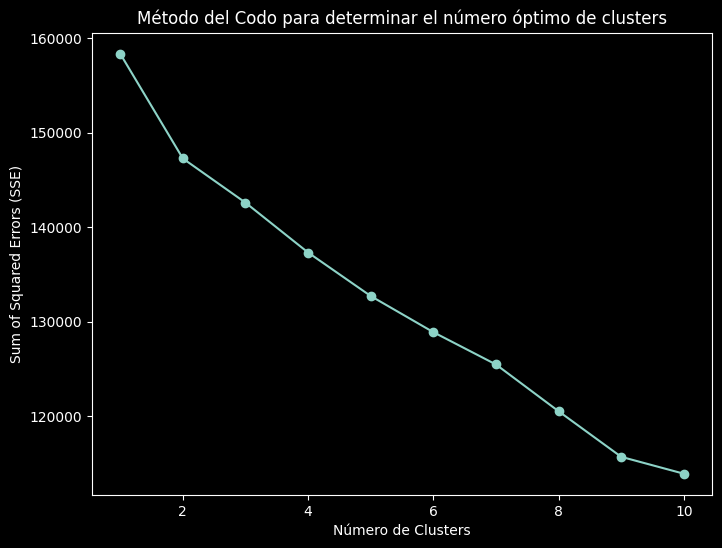

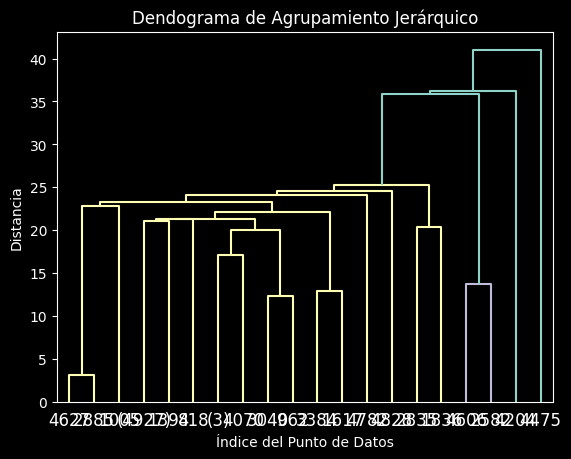

In [6]:
# división del conjunto de datos
X, y = (standarized_df[[
    "an01_1",
    "an01_2",
    "an04_1",
    "an08_2",
    "an12_1",
    "an15_1",
    "an17_1",
    "an21_1",
    "h0302",
    "h0303",
    "valor_HB1AC",
    "hb02",
    "valor_AC_URICO",
    "valor_GLU_SUERO",
    "valor_INSULINA",
    "valor_TRIG",
    "valor_EAG",
    "valor_VIT_B12",
    "fa0400",
    "fa0401",
    "fa0403",
    "fa0405",
    "fa0407h",
    "fa0408",
    "fa0409h",
    "fa0409m",
    "fa0410",
    "fa0411",
    "fa0412",
    "fa0413",
    "fa0414",
    "fa0415"]],
    merged_df["a0301"]
)

print("\n")
print(merged_df.describe())
print("\n")
print(standarized_df.describe())


# Determinación del número óptimo de clusters utilizando el método del codo
sse = []  # Sum of Squared Errors

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

linkage = linkage(X, method='single')

dendrogram(linkage, orientation='top', distance_sort='descending', show_leaf_counts=True, p=10, truncate_mode='level')
plt.title('Dendograma de Agrupamiento Jerárquico')
plt.xlabel('Índice del Punto de Datos')
plt.ylabel('Distancia')
plt.show()

## Desarrollo del Modelo Predictivo.

### Implemente el modelo de regresión logística o lineal para hacer la clasificación, según considere sea el mas indicado.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regrLog = LogisticRegression()
regrLog.fit(X_train, y_train)
y_predLog = regrLog.predict(X_test)

## Evaluación del Modelo.

### Evalúe el modelo utilizando métricas como precisión, sensibilidad y el Área Bajo la Curva (AUC) del Receiver Operating Characteristic (ROC).

In [8]:
print("----------Regresión Logistica----------")
print(f"Accuary: {metrics.accuracy_score(y_test, y_predLog)}")
print(f"Precision: {metrics.precision_score(y_test, y_predLog)}")
print(f"Recall: {metrics.recall_score(y_test, y_predLog)}")
print(f"Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_predLog)}")
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predLog).ravel()
print(f"Specificity: {tn / (tn + fp)}")
print(f"AUC-ROC: {metrics.roc_auc_score(y_test, y_predLog)}")
print("\n")

----------Regresión Logistica----------
Accuary: 0.8888888888888888
Precision: 0.5609756097560976
Recall: 0.2
Confusion Matrix:
[[ 23  92]
 [ 18 857]]
Specificity: 0.2
AUC-ROC: 0.5897142857142857


